In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

In [3]:
from google.colab import drive #to import google drive data

In [4]:
drive.mount('/content/drive') #to mount the drive data into colab clound and enter the activation code

Mounted at /content/drive


In [5]:
cd /content/drive/"My Drive/Colab Notebooks/Practical_1"

/content/drive/My Drive/Colab Notebooks/Practical_1


In [8]:
col_names=['s1','c1','s2','c2','s3','c3','s4','c4','s5','c5','classes' ]
dataset=pd.read_csv("poker-hand-training-true.data",names=col_names)
print(dataset)
dataset.shape

       s1  c1  s2  c2  s3  c3  s4  c4  s5  c5  classes
0       1  10   1  11   1  13   1  12   1   1        9
1       2  11   2  13   2  10   2  12   2   1        9
2       3  12   3  11   3  13   3  10   3   1        9
3       4  10   4  11   4   1   4  13   4  12        9
4       4   1   4  13   4  12   4  11   4  10        9
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..      ...
25005   3   9   2   6   4  11   4  12   2   4        0
25006   4   1   4  10   3  13   3   4   1  10        1
25007   2   1   2  10   4   4   4   1   4  13        1
25008   2  12   4   3   1  10   1  12   4   9        1
25009   1   7   3  11   3   3   4   8   3   7        1

[25010 rows x 11 columns]


(25010, 11)

In [9]:
dataset_test = pd.read_csv("poker-hand-testing.data",names=col_names)
print(dataset_test)
dataset_test.shape

        s1  c1  s2  c2  s3  c3  s4  c4  s5  c5  classes
0        1   1   1  13   2   4   2   3   1  12        0
1        3  12   3   2   3  11   4   5   2   5        1
2        1   9   4   6   1   4   3   2   3   9        1
3        1   4   3  13   2  13   2   1   3   6        1
4        3  10   2   7   1   2   2  11   4   9        0
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ..      ...
999995   3   1   1  12   2   9   4   9   2   6        1
999996   3   3   4   5   2   7   1   4   4   3        1
999997   1  11   4   7   3   9   1  13   2   7        1
999998   3  11   1   8   1   1   3  13   2   8        1
999999   2   5   2   9   4   9   2   3   3   3        2

[1000000 rows x 11 columns]


(1000000, 11)

In [37]:
x_train =dataset.drop(['classes'], axis=1)
y_train = dataset['classes']

In [38]:
y_train.groupby(y_train).size()

classes
0    12493
1    10599
2     1206
3      513
4       93
5       54
6       36
7        6
8        5
9        5
Name: classes, dtype: int64

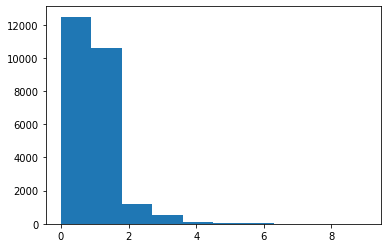

In [39]:
plt.hist(y_train)
plt.show() 

In [44]:
x_train

,s1,c1,s2,c2,s3,c3,s4,c4,s5,c5
0,1,10,1,11,1,13,1,12,1,1
1,2,11,2,13,2,10,2,12,2,1
2,3,12,3,11,3,13,3,10,3,1
3,4,10,4,11,4,1,4,13,4,12
4,4,1,4,13,4,12,4,11,4,10
...,...,...,...,...,...,...,...,...,...,...
25005,3,9,2,6,4,11,4,12,2,4
25006,4,1,4,10,3,13,3,4,1,10
25007,2,1,2,10,4,4,4,1,4,13
25008,2,12,4,3,1,10,1,12,4,9


In [40]:
x_test =dataset_test.drop(['classes'], axis=1)
y_test = dataset_test['classes']

In [41]:
y_test.groupby(y_test).size()

classes
0    501209
1    422498
2     47622
3     21121
4      3885
5      1996
6      1424
7       230
8        12
9         3
Name: classes, dtype: int64

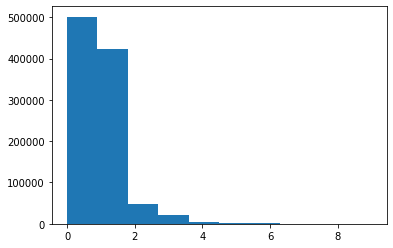

In [42]:
plt.hist(y_test)
plt.show() 

In [43]:
x_test

,s1,c1,s2,c2,s3,c3,s4,c4,s5,c5
0,1,1,1,13,2,4,2,3,1,12
1,3,12,3,2,3,11,4,5,2,5
2,1,9,4,6,1,4,3,2,3,9
3,1,4,3,13,2,13,2,1,3,6
4,3,10,2,7,1,2,2,11,4,9
...,...,...,...,...,...,...,...,...,...,...
999995,3,1,1,12,2,9,4,9,2,6
999996,3,3,4,5,2,7,1,4,4,3
999997,1,11,4,7,3,9,1,13,2,7
999998,3,11,1,8,1,1,3,13,2,8


**Random Forest Classifier**

In [46]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [47]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.501209

**KNeighbour Classifier**

In [61]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,25):
  print("For K = ",i);
  knc = KNeighborsClassifier(i)
  knc.fit(x_train, y_train)
  y_pred=knc.predict(x_test)
  print(accuracy_score(y_test,y_pred))


For K =  1
0.51182
For K =  2
0.549625
For K =  3
0.539248
For K =  4
0.556856
For K =  5
0.552178
For K =  6
0.564056
For K =  7
0.559171
For K =  8
0.567977
For K =  9
0.564386
For K =  10
0.571009
For K =  11
0.567766
For K =  12
0.572604
For K =  13
0.570618
For K =  14
0.574307
For K =  15
0.57321
For K =  16
0.575557
For K =  17
0.574293
For K =  18
0.576169
For K =  19
0.575862
For K =  20
0.577601
For K =  21
0.576707
For K =  22
0.578517
For K =  23
0.57774
For K =  24
0.578699
